Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
%matplotlib inline

Reading the data file

In [2]:
data = pd.read_csv("diabetes.csv")

Making a Heatmap for better analysis of the conditions in diabtetic patients

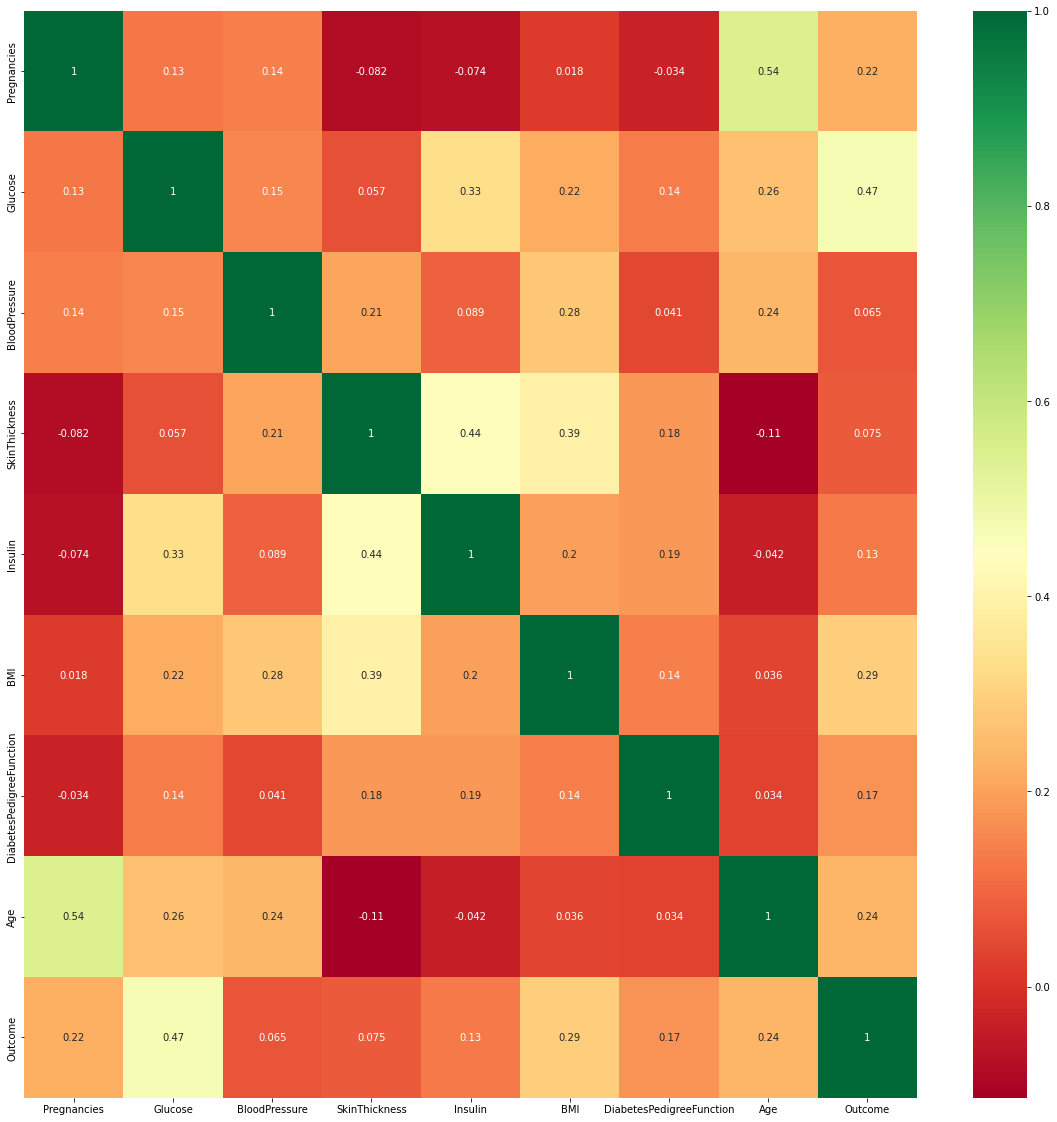

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Making Columns for Features and Prediction Variables

In [4]:
from sklearn.model_selection import train_test_split
feature = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted = ['Outcome']

Splitting Data for Features and Predicted

In [5]:
X = data[feature].values
y = data[predicted].values

Using RandomForests Classifier

Testing.

In [6]:
X_pred = [[1,103,30,38,83,43.3,0.183,33]]
X_pred = pd.DataFrame(X_pred, columns=['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

Importing RandomForest

In [7]:
import sklearn
model=RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(X,y)

prediction = model.predict(X_pred)
acc = metrics.accuracy_score(prediction,y[0])

C:\Users\user\AppData\Local\Temp/ipykernel_21212/2030810289.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Saving the model using pickle

In [8]:
import pickle
#setting savename
savename = "model.sav"
#dumping model into the file
pickle.dump(model, open(savename, "wb"))

Testing if the model is loading properly

In [9]:
load_model = pickle.load(open(savename, "rb"))
single = load_model.predict(X_pred)[0]
probability = load_model.predict_proba(X_pred)[:,1][0]*100
if single==1:
        output = "The patient is diagnosed with Diabetes"
        output1 = "Confidence: {}".format(probability)
else:
    output = "The patient is not diagnosed with Diabetes"
    output1 = ""

print(output)
print(output1)

The patient is not diagnosed with Diabetes



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
